<a href="https://colab.research.google.com/github/nhumam123/gcolab/blob/main/Decision_Tree_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import tree
import graphviz
from IPython.display import Image, display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Data yang diberikan
data = [
    ["sales", "senior", "31 - 35", "46K - 50K", 30],
    ["sales", "junior", "26 - 30", "26K - 30K", 40],
    ["sales", "junior", "31 - 35", "31K - 35K", 40],
    ["systems", "junior", "21 - 25", "46K - 50K", 20],
    ["systems", "senior", "31 - 35", "66K - 70K", 5],
    ["systems", "junior", "26 - 30", "46K - 50K", 3],
    ["systems", "senior", "41 - 45", "66K - 70K", 3],
    ["marketing", "senior", "36 - 40", "46K - 50K", 10],
    ["marketing", "junior", "31 - 35", "41K - 45K", 4],
    ["secretary", "senior", "46 - 50", "36K - 40K", 4],
    ["secretary", "junior", "26 - 30", "26K - 30K", 6]
]

In [ ]:
# Define the age range to numerical value mapping
department_mapping = {
    "sales": 1,
    "systems": 2,
    "marketing": 3,
    "secretary": 4,
}

age_range_mapping = {
    "21 - 25": 1,
    "26 - 30": 2,
    "31 - 35": 3,
    "36 - 40": 4,
    "41 - 45": 5,
    "46 - 50": 6,
}

# Define the salary range to numerical value mapping
salary_range_mapping = {
    "26K - 30K": 1,
    "31K - 35K": 2,
    "36K - 40K": 3,
    "41K - 45K": 4,
    "46K - 50K": 5,
    "66K - 70K": 6,
}

for row in data:
 row[0] = department_mapping.get(row[0],row[0])  # Departement
 row[2] = age_range_mapping.get(row[2], row[2])  # Age
 row[3] = salary_range_mapping.get(row[3], row[3])  # Salary

data

[[1, 'senior', 3, 5, 30],
 [1, 'junior', 2, 1, 40],
 [1, 'junior', 3, 2, 40],
 [2, 'junior', 1, 5, 20],
 [2, 'senior', 3, 6, 5],
 [2, 'junior', 2, 5, 3],
 [2, 'senior', 5, 6, 3],
 [3, 'senior', 4, 5, 10],
 [3, 'junior', 3, 4, 4],
 [4, 'senior', 6, 3, 4],
 [4, 'junior', 2, 1, 6]]

In [ ]:

# Define the headers
headers = ["department", "status", "usia", "gaji", "jumlah"]

# Expand the data based on the tuple
expanded_data = []
for row in data:
    department, status, usia, gaji, jumlah = row
    expanded_data.extend([[department, status, usia, gaji]] * jumlah)

expanded_df = pd.DataFrame(expanded_data, columns=headers[:-1])

# Display the expanded DataFrame
expanded_df


,department,status,usia,gaji
0,1,senior,3,5
1,1,senior,3,5
2,1,senior,3,5
3,1,senior,3,5
4,1,senior,3,5
...,...,...,...,...
160,4,junior,2,1
161,4,junior,2,1
162,4,junior,2,1
163,4,junior,2,1


In [ ]:
# Set df value to expanded_df value
df = expanded_df

In [ ]:
X = df.drop("status", axis=1)  # Drop status column
y = df["status"]  # Target variable

# Data  X after dropping status
X

,department,usia,gaji
0,1,3,5
1,1,3,5
2,1,3,5
3,1,3,5
4,1,3,5
...,...,...,...
160,4,2,1
161,4,2,1
162,4,2,1
163,4,2,1


In [ ]:
# Expected Output
y

0      senior
1      senior
2      senior
3      senior
4      senior
        ...  
160    junior
161    junior
162    junior
163    junior
164    junior
Name: status, Length: 165, dtype: object

In [ ]:
# # Preprocessing (Label Encoding)
# label_encoders = {}
# categorical_columns = ["department", "usia", "gaji"]

# for column in categorical_columns:
#     le = LabelEncoder()
#     X[column] = le.fit_transform(X[column])
#     label_encoders[column] = le

# print(X)

In [ ]:
# Split data training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Training Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Testing the data using test dataset
y_pred = clf.predict(X_test)
print(y_pred)

['junior' 'junior' 'senior' 'junior' 'junior' 'senior' 'senior' 'junior'
 'junior' 'senior' 'senior' 'junior' 'senior' 'junior' 'senior' 'junior'
 'senior' 'junior' 'junior' 'senior' 'junior' 'senior' 'senior' 'senior'
 'junior' 'senior' 'junior' 'junior' 'senior' 'junior' 'senior' 'junior'
 'junior']


In [ ]:
# Calculate the accuracy and get report
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      junior       1.00      1.00      1.00        18
      senior       1.00      1.00      1.00        15

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



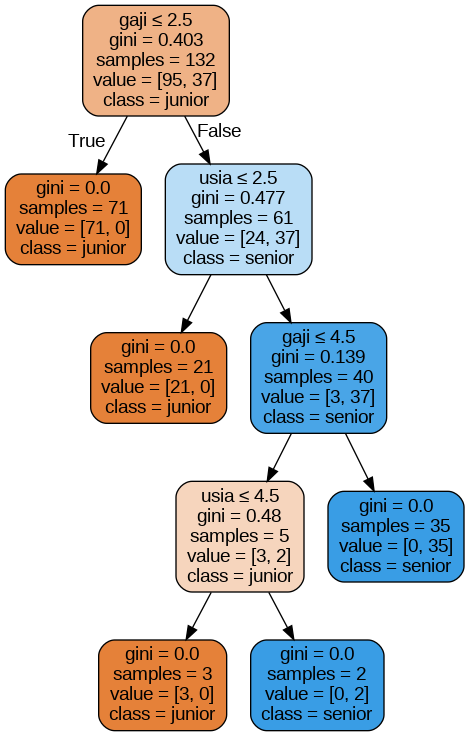

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=list(X.columns),
                                class_names=["junior", "senior"],
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)

png_image = Image(graph.pipe(format='png'))
png_image

In [ ]:
print(X_test)

     department  usia  gaji
135           2     2     5
115           2     1     5
131           2     3     6
55            1     2     1
95            1     3     2
29            1     3     5
158           4     6     3
51            1     2     1
101           1     3     2
145           3     4     5
19            1     3     5
85            1     3     2
15            1     3     5
66            1     2     1
24            1     3     5
30            1     2     1
132           2     3     6
105           1     3     2
153           3     3     4
16            1     3     5
75            1     3     2
18            1     3     5
12            1     3     5
9             1     3     5
31            1     2     1
156           4     6     3
98            1     3     2
56            1     2     1
134           2     3     6
161           4     2     1
139           2     5     6
78            1     3     2
60            1     2     1


In [ ]:
# Testing the decision tree model
data_pred = [
    ["sales", "31 - 35", "46K - 50K"],
    ["sales", "26 - 30", "26K - 30K"],
    ["sales", "31 - 35", "31K - 35K"],
    ["systems", "26 - 30",  "46K - 50K"]
]


for row in data_pred:
 row[0] = department_mapping.get(row[0],row[0])  # Departement
 row[1] = age_range_mapping.get(row[1], row[1])  # Age
 row[2] = salary_range_mapping.get(row[2], row[2])  # Salary

# Create a DataFrame for the input data
columns_pred = ["department", "usia", "gaji"]
df_pred = pd.DataFrame(data_pred, columns=columns_pred)


# Predict data
y_pred_data = clf.predict(df_pred)

# Display the predicted values
print(y_pred_data)


['senior' 'junior' 'junior' 'junior']
